### Análisis y Procesamiento de Señales - 2do Cuatrimestre 2025
# **Tarea Semanal 5**: *Estimación Espectral: Ancho de Banda de Señales Reales*
#### Mora Taranilla y Victoria Jazmín Salgado

## **Resumen**:
El objetivo de esta Tarea Semanal fue realizar la estimación de la densidad espectral de potencia (PSD) de señales reales.  A partir de ésto, se estima asimismo el ancho de banda de cada señal. 

## **Introducción Teórica**
En este trabajo y a diferencia de los anteriores, se comienza a tratar con señales reales, que son de naturaleza estocástica. 
Debido a esto, es necesario realizar una estimación de la Densidad Espectral de Potencia (PSD por sus siglas en inglés). 
Para poder calcular directamente la DSP, sería necesario contar con infinitas muestras de la señal o infinitas realizaciones, para obtener "la imagen completa" del fenómeno aleatorio. Como esto es imposible en la práctica, se estima el espectro de potencia de la señal, donde puede observarse la distribución de la potencia de la señal en las diferentes frecuencias que la componen. 
Para llevar esta tarea a cabo existen diferentes métodos. Algunos de ellos trabajan sobre la mejora de la varianza del periodograma, mientras que otros trabajan sobre la mejora de la secuencia de autocorrelación de la señal. En este caso se trabajará con el Método de Welch, que apunta a disminuir la varianza del Periodograma. 

El periodograma puede definirse como un estimador de la Densidad Espectral de Frecuencias de la siguiente manera: 

$$
\hat{S}_{XX}(k, N) = \frac{1}{N}|X[k]|^2
$$

El problema con el uso directo del periodograma como estimador, es que por su naturaleza no presenta una mejora de la varianza con la cantidad de muestras. Para que un estimador sea deseable, se busca que sea consistente: es decir que sea asintóticamente insesgado y que su varianza disminuya al aumentar la cantidad de muestras. Por este motivo, surge por ejemplo el método de Welch.

Éste método no paramétrico (ya que no depende de contar con información sobre la señal analizada), comienza por separar la señal aleatoria en L segmentos de longitud M, que se superponen en D puntos.  

Luego, para cada uno de estos segmentos, se aplica una ventana en el dominio del tiempo, para luego calcular su periodograma como se describió previamente. Luego, se promediarán todos estos estimadores calculados, obteniendo finalmente el estimador de la densidad espectral de potencia. 

Por realizar un promedio de variables no correladas, la varianza tenderá a cero, lo que convierte al periodograma computado por el método de Welch en un estimador consistente de la PSD. Sin embargo, como resultado de la utilización de ventanas que no son la rectangular (aquella que se utiliza inevitablemente y que permite la mejor resolución de frecuencia), se tendrá una resolución espectral menor que en el periodograma. 

Por otro lado, aparece el concepto de Ancho de Banda de una señal.
Puede definirse al ancho de banda como la porción del espectro de frecuencias donde la señal entrega un porcentaje deseado de su potencia total; generalmente este número está alrededor del 99%. Es decir, a partir de ciertas frecuencias, se encuentran solo aquellas que entregan $\approx$1% de la potencia total, por lo que no se consideran dentro del ancho de banda.

## **Desarrollo y Análisis**

Se cuenta con tres señales reales de tipos diferentes:
- Electrocardiograma (ECG)
- Pletismografía (PPG)
- Audio

A partir de ellas, se busca:
- Realizar la estimación de la Densidad Espectral de Potencia (PSD) de cada señal
- Realizar una estimación del ancho de banda de cada señal y presentar los resultados en una tabla

Luego, se debe proponer algún otro tipo de señal que no haya sido analizada para repetir el análi, explicando su origen y cómo fue digitalizada.



Se comienza por importar las librerías necesarias y leer la señal de ECG, para luego graficarla. 

In [2]:
import numpy as np
import scipy.signal as sig
import matplotlib.pyplot as plt
import scipy.io as sio
from scipy.io.wavfile import write

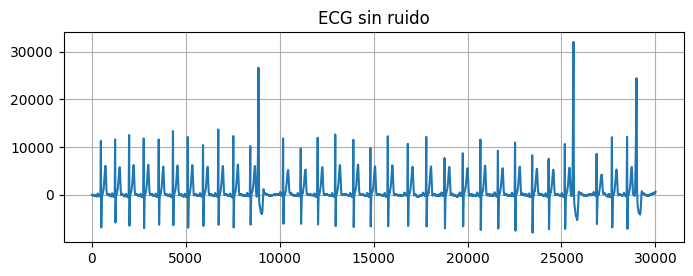

In [4]:
#ECG
fs_ecg = 1000 # Hz

# Cargo la señal
ecg_one_lead = np.load('ecg_sin_ruido.npy')
#.shape devuelve tuplas
N = ecg_one_lead.shape[0] #solo el elemento 0


plt.figure(figsize=(8, 6))
plt.subplot(2,1,1)
plt.title("ECG sin ruido")
plt.grid(True)
plt.plot(ecg_one_lead)

Una vez que se cuenta con la señal, se introducen los parámetros deseados para utilizar el método de Welch

In [5]:
cant_promedios = 30
nperseg = N // cant_promedios
nfft = 2 * nperseg
win = "hamming"

Se implementa el método a través de la función de *scipy.signal* welch. Luego se grafica la densidad espectral de potencias obtenida. 

In [6]:
f, Pxx = sig.welch(ecg_one_lead, fs=fs_ecg, window = win, nperseg=nperseg, nfft=nfft)

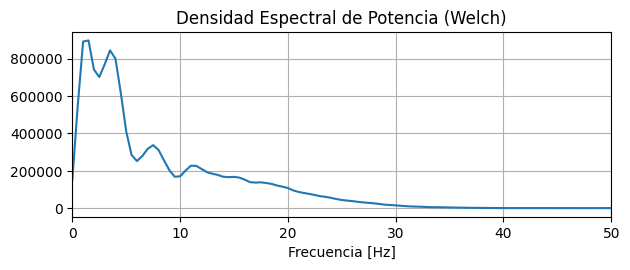

In [9]:
#Gráfico de la PSD - normal
plt.subplot(2,1,2)
plt.plot(f, Pxx)
plt.title("Densidad Espectral de Potencia (Welch)")
plt.xlabel("Frecuencia [Hz]")
plt.grid(True)
plt.xlim([0, 50]) #como es pasabajos, limito
plt.tight_layout()
plt.show()

A continuación se lee la señal de PPG, se estima su DSP mediante Welch y se grafica

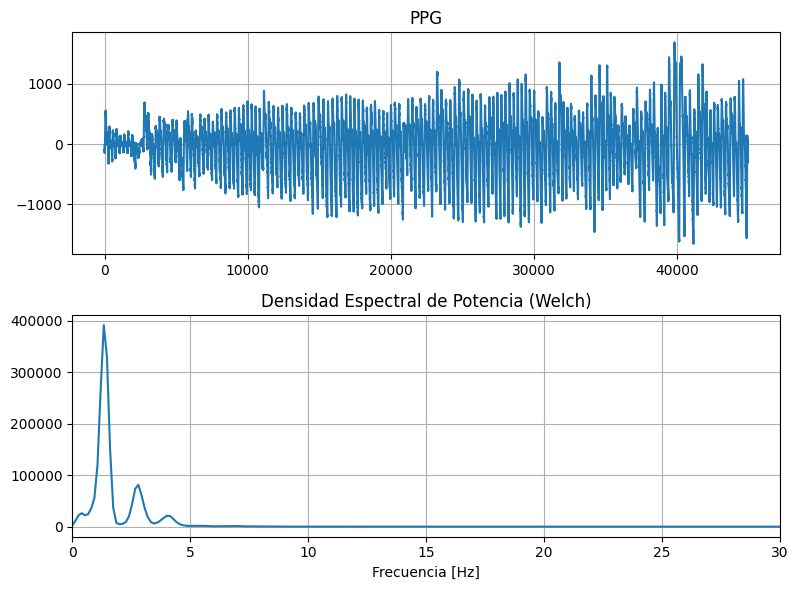

In [11]:
fs_ppg = 400 # Hz
ppg = np.load('ppg_sin_ruido.npy')

N_ppg = ppg.shape[0] 

plt.figure(figsize=(8, 6))
plt.subplot(2,1,1)
plt.title("PPG")
plt.grid(True)
plt.plot(ppg)

#PARAMETROS WELCH

cant_promedios_ppg = 20 
nperseg_ppg = N // cant_promedios_ppg
nfft_ppg = 2 * nperseg_ppg
win_ppg = "hamming"

f_ppg, Pxx_ppg = sig.welch(ppg, fs=fs_ppg, window = win_ppg, nperseg=nperseg_ppg, nfft=nfft_ppg)

#Gráfico de la PSD - PPG
plt.subplot(2,1,2)
plt.plot(f_ppg, Pxx_ppg)
plt.title("Densidad Espectral de Potencia (Welch)")
plt.xlabel("Frecuencia [Hz]")
plt.grid(True)
plt.tight_layout()
plt.xlim([0, 30]) #como es pasabajos, limito
plt.show()

Para finalizar, se repiten los pasos detallados anteriormente para una señal de audio:

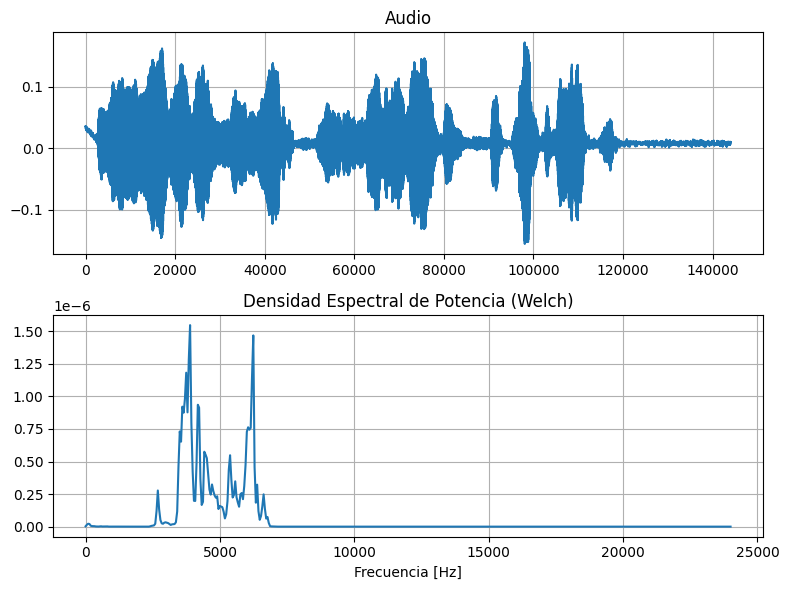

In [15]:
fs_audio, wav_data = sio.wavfile.read('silbido.wav')

N_audio = wav_data.shape[0] 

plt.figure(figsize=(8, 6))
plt.subplot(2,1,1)
plt.title("Audio")
plt.grid(True)
plt.plot(wav_data)

# Para poder escuchar el audio:
# import sounddevice as sd
# sd.play(wav_data, fs_audio)

#PARAMETROS WELCH

cant_promedios_audio = 30 
nperseg_audio = N // cant_promedios_audio
nfft_audio = 1 * nperseg_audio
win_audio = "hamming"

f_audio, Pxx_audio = sig.welch(wav_data, fs=fs_audio, window = win_audio, nperseg=nperseg_audio, nfft=nfft_audio)

#Gráfico de la PSD - Audio
plt.subplot(2,1,2)
plt.plot(f_audio, Pxx_audio)
plt.title("Densidad Espectral de Potencia (Welch)")
plt.xlabel("Frecuencia [Hz]")
plt.grid(True)
plt.tight_layout()
plt.show()

De esta manera se obtuvieron los DSP de las tres señales. 
Cabe destacar que la elección de los parámetros de Welch se hace de manera empírica; no existe una regla general que determine cuántos promedios se debe utilizar. De todas maneras, se observa que a menor cantidad de promedios se obtiene una PSD con una varianza notable, en cambio al aumentar éste numero la varianza disminuye notablemente. Sin embargo, no debe elegirse un número de promedios demasiado grande ya que existe el riesgo de perder información valiosa sobre la señal si la DSP estuviera demasiado suavizada.

Luego se procede a calcular el ancho de banda de cada una de las señales, de la siguiente manera:

In [16]:
#ANCHO DE BANDA ECG
porcentaje = 0.99

pot_acum = np.cumsum(Pxx)
pot_acum_norm = pot_acum / pot_acum[-1]  # normalizo, estoy accediendo a la ultima posición del vector cumsum que es el total

# Encuentro el índice donde la potencia supera el 99%
index_bw = np.where(pot_acum_norm >= porcentaje)[0][0]

#np.where devuelve tupla de arrays, uno por cada dimensión.
#Primer [0] → extrae el array de índices de la tupla que devuelve np.where.
#Segundo [0] → toma el primer elemento de ese array.

# Frecuencia correspondiente
freq_bw = f[index_bw]
print(f"Ancho de banda - Señal ECG:", freq_bw)

Ancho de banda - Señal ECG: 31.0


In [22]:
#ANCHO DE BANDA PPG
porcentaje_ppg = 0.99

pot_acum_ppg = np.cumsum(Pxx_ppg)
pot_acum_norm_ppg = pot_acum_ppg / pot_acum_ppg[-1]  

index_bw_ppg = np.where(pot_acum_norm_ppg >= porcentaje_ppg)[0][0]

freq_bw_ppg = f_ppg[index_bw_ppg]
print(f"Ancho de banda - Señal PPG: {freq_bw_ppg:.2f}")

Ancho de banda - Señal PPG: 5.47


In [24]:
pot_acum_audio = np.cumsum(Pxx_audio)
pot_acum_norm_audio = pot_acum_audio / pot_acum_audio[-1]  

porcentaje_audio = 

index_inf_bw_audio = np.where(pot_acum_norm_audio >= 0.01)[0][0]
index_bw_audio = np.where(pot_acum_norm_audio >= porcentaje_audio)[0][0]

# Frecuencia correspondiente
freq_inf_bw_audio = f_audio[index_inf_bw_audio]
freq_bw_audio = f_audio[index_bw_audio]
print(f"Frecuencia correspondiente a la Cota Inferior  - Ancho de Banda señal de audio: {freq_inf_bw_audio:.2f}")
print(f"Frecuencia correspondiente a la Cota Superior - Ancho de Banda señal de Audio: {freq_bw_audio:.2f}")

Frecuencia correspondiente a la Cota Inferior  - Ancho de Banda señal de audio: 2688.00
Frecuencia correspondiente a la Cota Superior - Ancho de Banda señal de Audio: 6672.00


## **Bonus**:
Proponer algún tipo de señal que no haya sido analizada y repetir el análisis. Explicar su origen y cómo fue digitalizada.

La obtención de la Densidad Espectral de Potencia (PSD) tiene múltiples aplicaciones prácticas interesantes, y una de ellas es la astronomía. Un uso particular es el análisis de la curva de luz de una estrella.

Una curva de luz es un gráfico que muestra la intensidad lumínica de un objeto o región celestial como función del tiempo. Lo interesante, para este trabajo, es que la PSD permite identificar patrones repetitivos en la señal de brillo de la estrella, reflejando las frecuencias a las que ocurren estos eventos. La PSD ilustra tanto estas frecuencias como la energía asociada a cada una, de manera que los picos representan fenómenos que se repiten con mayor frecuencia y que son de interés. Estos fenómenos pueden incluir, por ejemplo, manchas estelares o el cruce de un planeta frente a la estrella, pero también se observa ruido en la señal, por lo que el análisis gráfico resulta muy útil.

El telescopio espacial Kepler, lanzado en 2009, tenía como objetivo medir el brillo de las estrellas. Fue diseñado para observar de manera continua unas 150.000 estrellas en una franja del cielo correspondiente a la constelación del Cisne. Kepler detectó planetas que orbitan alrededor de estas estrellas observando tránsitos, pequeñas caídas en el brillo estelar que ocurren cuando un planeta pasa frente a su estrella.

Para analizar la PSD de la estrella Kepler-10 se utilizó la librería de Python lightkurve, que permite acceder de manera sencilla a este tipo de datos.

In [4]:
from lightkurve import search_lightcurvefile
from scipy.signal import welch
import matplotlib.pyplot as plt
import numpy as np

# Descargar la curva de luz
lc_file = search_lightcurvefile("Kepler-10", mission="Kepler").download()
lc = lc_file.PDCSAP_FLUX.remove_nans()
t, flux = lc.time.value, lc.flux.value

/tmp/ipykernel_3535/3880187617.py:7: LightkurveDeprecationWarning: The search_lightcurvefile function is deprecated and may be removed in a future version.
        Use search_lightcurve() instead.
  lc_file = search_lightcurvefile("Kepler-10", mission="Kepler").download()
/home/victoria24/victorias/lib/python3.10/site-packages/lightkurve/search.py:420: LightkurveWarning: Warning: 50 files available to download. Only the first file has been downloaded. Please use `download_all()` or specify additional criteria (e.g. quarter, campaign, or sector) to limit your search.
  warnings.warn(
/tmp/ipykernel_3535/3880187617.py:8: LightkurveDeprecationWarning: The PDCSAP_FLUX function is deprecated and may be removed in a future version.
  lc = lc_file.PDCSAP_FLUX.remove_nans()


In [6]:
# Frecuencia de muestreo en 1/día
fs_days = 1 / np.median(np.diff(t))

# ------------------------------------------------
# Configuración de Welch usando cantidad de promedios
cant_promedios = 70  # ajustar según quieras más suavizado o más resolución
nperseg = len(flux) // cant_promedios
nfft = 1 * nperseg
window = "hamming"

# Calcular PSD
f_days, Pxx = welch(flux, fs=fs_days, window=window, nperseg=nperseg, nfft=nfft)


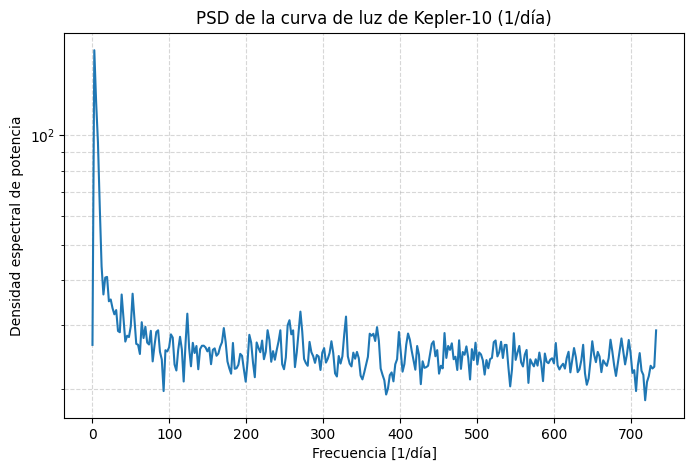

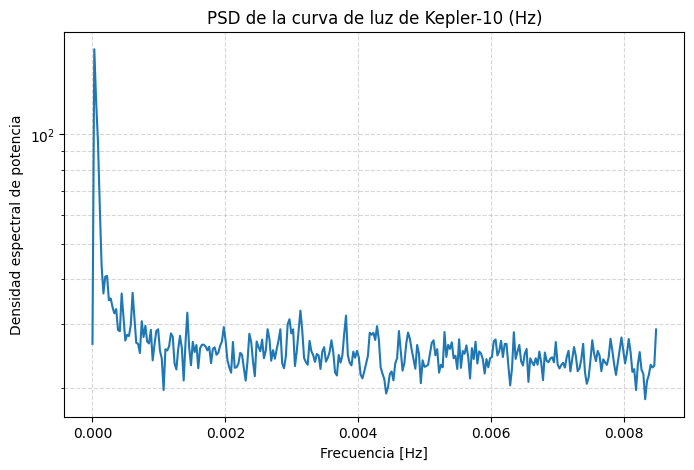

In [8]:
plt.figure(figsize=(8,5))
plt.semilogy(f_days, Pxx)# Frecuencia de muestreo en 1/día
fs_days = 1 / np.median(np.diff(t)) #para obtener intervalo típico entre mediciones porque pueden no ser constantes


cant_promedios = 70  
nperseg = len(flux) // cant_promedios
nfft = 1 * nperseg
window = "hamming"

# Calcular PSD
f_days, Pxx = welch(flux, fs=fs_days, window=window, nperseg=nperseg, nfft=nfft)

plt.xlabel("Frecuencia [1/día]")
plt.ylabel("Densidad espectral de potencia")
plt.title("PSD de la curva de luz de Kepler-10 (1/día)")
plt.grid(True, which="both", ls="--", alpha=0.5)
plt.show()

# Convertir frecuencia a Hz
f_Hz = f_days / 86400  # 1 día = 86400 s

plt.figure(figsize=(8,5))
plt.semilogy(f_Hz, Pxx)
plt.xlabel("Frecuencia [Hz]")
plt.ylabel("Densidad espectral de potencia")
plt.title("PSD de la curva de luz de Kepler-10 (Hz)")
plt.grid(True, which="both", ls="--", alpha=0.5)
plt.show()

Al observar el gráfico de la PSD, se identifica un pico a bajas frecuencias, lo que indica la presencia de un fenómeno que se repite de manera significativa en el tiempo. No se profundiza en su origen, ya que no es el objetivo de este trabajo, pero resulta un hallazgo interesante que ilustra cómo la PSD permite detectar patrones repetitivos en la señal de brillo de la estrella.